In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [61]:
data=pd.read_csv("H:\Data Science\My projects\weight predictor\weight-height.csv")

In [3]:
data.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [46]:
data.info

<bound method DataFrame.info of      Gender    Height    Weight
0         1  1.951500  2.513152
1         1  0.630389  0.027724
2         1  2.020120  1.602695
3         1  1.399583  1.830729
4         1  0.917269  1.403099
...     ...       ...       ...
9995      0 -0.050171 -0.769688
9996      0  0.183138  0.294978
9997      0 -0.651285 -1.028969
9998      0  0.696205  0.075881
9999      0 -1.153047 -1.492000

[9992 rows x 3 columns]>

In [25]:
data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [68]:
data['Gender']=data['Gender'].replace("Male","1")
data['Gender']=data['Gender'].replace("Female","0")

# OUTLIER ANALYSIS

{'whiskers': [<matplotlib.lines.Line2D at 0x1eae5791fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1eae57b4fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eae5791448>],
 'medians': [<matplotlib.lines.Line2D at 0x1eae57b8f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eae57bc988>],
 'means': []}

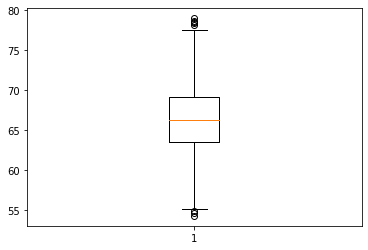

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(data['Height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1eae5819708>,
 'caps': [<matplotlib.lines.Line2D at 0x1eae5819fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eae5812c88>],
 'medians': [<matplotlib.lines.Line2D at 0x1eae581df48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eae5822dc8>],
 'means': []}

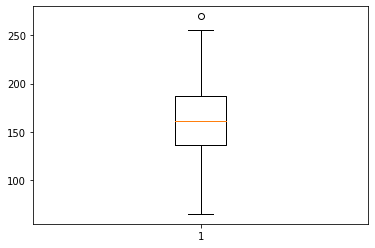

In [63]:
plt.boxplot(data['Weight'])

In [12]:
cnames=['Weight','Height']

In [13]:
cnames

['Weight', 'Height']

In [14]:
for i in cnames:
    print(i)
    q75,q25=np.percentile(data.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25-(1.5*iqr)
    max=q75+(1.5*iqr)
    data=data.drop(data[data.loc[:,i]<min].index)
    data=data.drop(data[data.loc[:,i]>max].index)

Weight
Height


# MISSING VALUE ANALYSIS


In [ ]:
missing_value=pd.DataFrame(data.isnull().sum())

In [16]:
missing_value

,0
Gender,0
Height,0
Weight,0


In [39]:
data1=data.drop(['Gender'],axis=1)

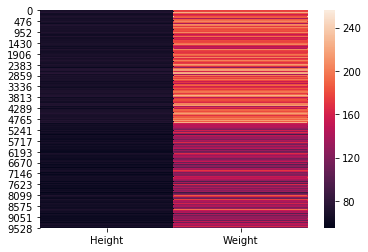

In [40]:
sns.heatmap(data1)

# FEATURE SCALING

(array([  51.,  266.,  962., 1751., 1999., 1989., 1616.,  979.,  317.,
          62.]),
 array([55.14855736, 57.38842026, 59.62828316, 61.86814606, 64.10800895,
        66.34787185, 68.58773475, 70.82759765, 73.06746055, 75.30732344,
        77.54718634]),
 <a list of 10 Patch objects>)

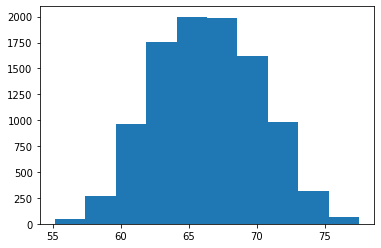

In [41]:
#TO CHECK DATA IS UNIFORMLY DISTRIBUTED OR NOT
plt.hist(data['Height'])

In [76]:
data.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [48]:
#sampling method
#we use simple random sampling because target variab;e is continuous

In [64]:
from sklearn.model_selection import train_test_split

In [82]:
train,test=train_test_split(data,test_size=0.2)


In [66]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
#decision tree for regression,0:2 in pyhton means selecting 0 to 1th variable
fit=DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:2],train.iloc[:,2])

In [84]:
#apply model on test data(actual data)
predictions_dt=fit.predict(test.iloc[:,0:2])

# ERROR CALCULATION ON REGRESSION MODELS#

In [85]:
##making function 
def MAPE(y_true,y_pred):
    mape=np.mean(np.abs((y_true - y_pred)/y_true))
    return mape

In [91]:
MAPE(test.iloc[:,2],predictions_dt)

0.07280812703504592

In [ ]:
#error=0.0728
#acc=.92272

# Linear reg model 

In [87]:
data['Gender']=data['Gender'].astype('float')

In [88]:
#import libraries for Python
import statsmodels.api as sm

#train the model using training sets
model=sm.OLS(train.iloc[:,2],train.iloc[:,0:2]).fit()

In [89]:
##make prediction my model
prediction_LR=model.predict(test.iloc[:,0:2])

In [90]:
#calculate MAPE
MAPE(test.iloc[:,2],prediction_LR)

0.07641024937039496

In [ ]:
#error=.0764
#accuracy= .9236

# Random forest classifier

In [94]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


In [96]:
# Train the model on training data
model=rf.fit(train.iloc[:,0:2],train.iloc[:,2]);

In [99]:
#apply model on test data(actual data)
predictions_dt=model.predict(test.iloc[:,0:2])

In [100]:
MAPE(test.iloc[:,2],predictions_dt)

0.06143871604449616

In [ ]:
##acc=.9386
#err=0.0614

# RIDGE REGRESSION

In [104]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,cv=5)

In [105]:
# Train the model on training data
ridge_model=ridge_regressor.fit(train.iloc[:,0:2],train.iloc[:,2]);

In [106]:
#apply model on test data(actual data)
predictions_ridge=ridge_model.predict(test.iloc[:,0:2])

In [107]:
MAPE(test.iloc[:,2],predictions_ridge)

0.051629761027938814

In [ ]:
##error=0.0516
#acc=0.9484

# FINAL MODEL

# OUT OF ALL THE APPLIED MODELS TGHE MAXIMUM ACCURACY IS FOR RIDGE REGRESSION


# SO WE CONSIDER RIDGE REGRESSION  AS OUR FINAL MODEL